<a href="https://colab.research.google.com/github/nrajmalwar/Project/blob/master/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nishad Rajmalwar, Batch F6, nrajmalwar@gmail.com

#Import Libraries and Modules

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras import losses

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


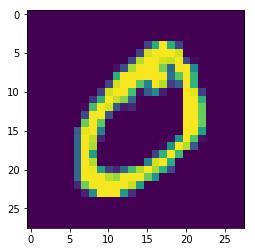

In [30]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Image Normalization

We do image normalization to distribute the pixel values of the images in normal or Gaussian form. The input mean is set to 0 and the input standard deviation is set to 1.

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    )

#use a generator object to iterate over training data
train_generator = datagen.flow(X_train, Y_train, batch_size=128)

#use a generator object to iterate over validation data
validation_generator = datagen.flow(X_test, Y_test, batch_size=128)

#Model Building

Build a model by adding ReLU activation after BatchNormalization

In [9]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #26, 3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3)) #24, 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1)) #24, 5
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#12, 10

model.add(Convolution2D(16, 3, 3))#10, 12
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#8, 14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#6, 16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#4, 18
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4)) #1, 21
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


Mount Google drive to save the model with highest validation accuracy using checkpoint

In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

checkpoint = ModelCheckpoint('/content/drive/My Drive/Colab Notebooks/EVA_Asgn_5.hdf5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#Custom Loss Function

Define a custom loss function to add the weights regularization term

In [0]:
def loss_with_reg(y_true, y_pred, lambda_=0.001):
  
  #collect all the model weights as a list of tensors
  weights = model.get_weights()    
    
  x = 0
  #iterate over the list
  for i in weights:
    x += K.sum(K.square(i)) #sqaure each value of the tensor and sum all the elements
  
  #Add the regularization term to the original loss function
  loss = losses.categorical_crossentropy(y_true, y_pred) + (lambda_*x)
  
  return loss

In [0]:
#pass the custom loss function in model.compile
model.compile(loss=loss_with_reg, optimizer=Adam(lr=0.003), metrics=['accuracy'])

#Model Fitting

Use model.fit_generator() to fit the training data and use LearningRateSchedular and checkpoint as callbacks. Run for 40 epochs.

In [14]:
model.fit_generator(train_generator, steps_per_epoch=np.ceil(len(X_train) / 128), epochs=40, verbose=1, validation_data=validation_generator, validation_steps = np.ceil(len(X_test)/128), callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])

Instructions for updating:
Use tf.cast instead.
Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 12s 26ms/step - loss: 0.8903 - acc: 0.8579 - val_loss: 0.4943 - val_acc: 0.9818

Epoch 00001: val_acc improved from -inf to 0.98180, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_5.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/469 [==============================] - 8s 16ms/step - loss: 0.6209 - acc: 0.9274 - val_loss: 0.4364 - val_acc: 0.9864

Epoch 00002: val_acc improved from 0.98180 to 0.98640, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_5.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/469 [==============================] - 8s 16ms/step - loss: 0.5705 - acc: 0.9417 - val_loss: 0.4223 - val_acc: 0.9889

Epoch 00003: val_acc improved from 0.98640 to 0.98890, saving model to /content/drive/My Drive/Colab Notebooks/EVA_Asgn_5.hdf5
Epoch 4/40



Load the best model from Google drive. Also, pass the custom loss function.

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/EVA_Asgn_5.hdf5', custom_objects= {'loss_with_reg':loss_with_reg})

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[1.5713163059234618, 0.9952]


#Model Prediction

Run the model prediction on Validation dataset

In [20]:
validation_generator = datagen.flow(X_test, Y_test, batch_size=128, shuffle=False)

predictions = model.predict_generator(validation_generator, steps=np.ceil(len(X_test)/128))  #prediction values for all 10 classes
predicted_classes = np.argmax(predictions, axis=-1)   #select the index of the list with highest prediction value
print(predicted_classes)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


[7 2 1 ... 4 5 6]


Collect the index of misclassified classes

In [21]:
mis_label = []

count = 0
for i in range(10000):
  
  if predicted_classes[i] != y_test[i]:
    mis_label.append(i)
    count +=1
    
print(count)

48


In [22]:
print(mis_label)

[193, 321, 359, 445, 449, 659, 938, 947, 1014, 1039, 1232, 1260, 1299, 1530, 1878, 1901, 2035, 2130, 2135, 2293, 2597, 2654, 3225, 3422, 3448, 3520, 3558, 3762, 3767, 4027, 4176, 4284, 4504, 4571, 4699, 4740, 4761, 4874, 5937, 6571, 6576, 6597, 6625, 6651, 8316, 8527, 9642, 9729]


# Plot Misclassified Images

Plot 25 misclassified images as an image gallery using subplots

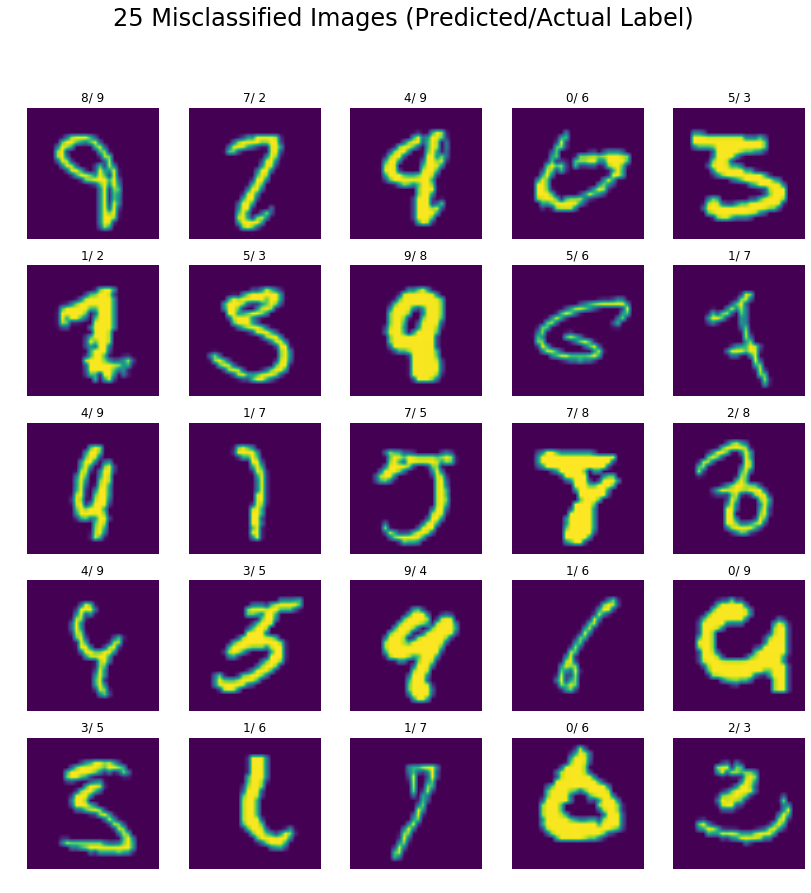

In [31]:
fig = plt.figure(figsize=(14, 14))
fig.suptitle('25 Misclassified Images (Predicted/Actual Label)', fontsize = 24)
j = 0

for i in mis_label[:25]:
    
    sub = fig.add_subplot(5, 5, j + 1)
    sub.imshow(X_test[i], interpolation='bilinear')
    plt.axis('off')
    j += 1
    
    sub.set_title(str(predicted_classes[i]) + '/ ' + str(y_test[i]))